<a href="https://colab.research.google.com/github/MarcellinusRyan20/SalesForecasting/blob/main/LG_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import skew
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [ ]:
# Open dataframe
df = pd.read_csv('LG 540 2019-2023 .csv')

## Data Preprocessing

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,TOTAL
1,2019.0,"4,804","4,979","6,756","5,229","5,419","10,356","5,150","6,825","6,952","6,056","10,179","5,511","78,217"
2,2020.0,"8,965","6,769","23,434","3,683","1,455","9,279","6,672","9,050","9,666","3,518","7,917","10,887","101,295"
3,2021.0,"13,403","11,900","3,204","8,459","4,840","15,810","1,736","5,166","8,078","2,399","11,653","6,577","93,225"
4,2022.0,"2,191","2,991","21,086","1,884","3,813","11,287","4,083","2,836","4,342","3,791","6,817","23,338","88,457"


In [ ]:
#Change NaN value to 'Year'
df.fillna('Year', inplace=True)
print(df)

  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0       Year        JAN        FEB        MAR        APR        MAY   
1     2019.0      4,804      4,979      6,756      5,229      5,419   
2     2020.0      8,965      6,769     23,434      3,683      1,455   
3     2021.0     13,403     11,900      3,204      8,459      4,840   
4     2022.0      2,191      2,991     21,086      1,884      3,813   
5     2023.0      6,859      5,224      8,187     11,962      6,447   
6       Year       Year       Year       Year       Year       Year   
7       Year       Year       Year       Year       Year       Year   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0        JUN        JUL        AUG        SEP         OCT         NOV   
1     10,356      5,150      6,825      6,952       6,056      10,179   
2      9,279      6,672      9,050      9,666       3,518       7,917   
3     15,810      1,736      5,166      8,078       2,399      11,65

In [ ]:
# Delete rows 6 and 7
df = df.iloc[:6,:]
print(df)

  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0       Year        JAN        FEB        MAR        APR        MAY   
1     2019.0      4,804      4,979      6,756      5,229      5,419   
2     2020.0      8,965      6,769     23,434      3,683      1,455   
3     2021.0     13,403     11,900      3,204      8,459      4,840   
4     2022.0      2,191      2,991     21,086      1,884      3,813   
5     2023.0      6,859      5,224      8,187     11,962      6,447   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0        JUN        JUL        AUG        SEP         OCT         NOV   
1     10,356      5,150      6,825      6,952       6,056      10,179   
2      9,279      6,672      9,050      9,666       3,518       7,917   
3     15,810      1,736      5,166      8,078       2,399      11,653   
4     11,287      4,083      2,836      4,342       3,791       6,817   
5      3,769      7,661      9,840      7,474       5,774      1

In [ ]:
# Set first rows as headers
df.columns = df.iloc[0]
df = df[1:]
print(df)

0    Year     JAN     FEB     MAR     APR    MAY     JUN    JUL    AUG    SEP  \
1  2019.0   4,804   4,979   6,756   5,229  5,419  10,356  5,150  6,825  6,952   
2  2020.0   8,965   6,769  23,434   3,683  1,455   9,279  6,672  9,050  9,666   
3  2021.0  13,403  11,900   3,204   8,459  4,840  15,810  1,736  5,166  8,078   
4  2022.0   2,191   2,991  21,086   1,884  3,813  11,287  4,083  2,836  4,342   
5  2023.0   6,859   5,224   8,187  11,962  6,447   3,769  7,661  9,840  7,474   

0    OCT     NOV     DEC    TOTAL  
1  6,056  10,179   5,511   78,217  
2  3,518   7,917  10,887  101,295  
3  2,399  11,653   6,577   93,225  
4  3,791   6,817  23,338   88,457  
5  5,774  13,824  21,503  108,524  


In [ ]:
# Change the type for year into interger
df['Year'] = df['Year'].astype(int)
print(df)

0  Year     JAN     FEB     MAR     APR    MAY     JUN    JUL    AUG    SEP  \
1  2019   4,804   4,979   6,756   5,229  5,419  10,356  5,150  6,825  6,952   
2  2020   8,965   6,769  23,434   3,683  1,455   9,279  6,672  9,050  9,666   
3  2021  13,403  11,900   3,204   8,459  4,840  15,810  1,736  5,166  8,078   
4  2022   2,191   2,991  21,086   1,884  3,813  11,287  4,083  2,836  4,342   
5  2023   6,859   5,224   8,187  11,962  6,447   3,769  7,661  9,840  7,474   

0    OCT     NOV     DEC    TOTAL  
1  6,056  10,179   5,511   78,217  
2  3,518   7,917  10,887  101,295  
3  2,399  11,653   6,577   93,225  
4  3,791   6,817  23,338   88,457  
5  5,774  13,824  21,503  108,524  


In [ ]:
# Change the data structure to long format by melting it
df = pd.melt(df, id_vars=['Year'], var_name='Month', value_name='Sales')
print(df)


    Year  Month    Sales
0   2019    JAN    4,804
1   2020    JAN    8,965
2   2021    JAN   13,403
3   2022    JAN    2,191
4   2023    JAN    6,859
..   ...    ...      ...
60  2019  TOTAL   78,217
61  2020  TOTAL  101,295
62  2021  TOTAL   93,225
63  2022  TOTAL   88,457
64  2023  TOTAL  108,524

[65 rows x 3 columns]


In [ ]:
# Check types of the data
print(df.dtypes)

Year      int64
Month    object
Sales    object
dtype: object


In [ ]:
# Since the Sales type is an object, change is needed to float
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)

In [ ]:
# Now, the type for Sales is already a float and analysis can be done
print(df.dtypes)

Year       int64
Month     object
Sales    float64
dtype: object


In [ ]:
# Split the current dataframe into df_month and df_total
df_total = df[df['Month']=='TOTAL']
df_month = df[df['Month']!='TOTAL']

In [ ]:
# Make the month and year as a date format then make it as an index for df_month
# Combine 'Year' and 'Month' columns and create a new 'YearMonth' column
df_month['YearMonth'] = df_month['Year'].astype(str) + '-' + df_month['Month']

# Convert 'YearMonth' to PeriodIndex
df_month['YearMonth'] = pd.to_datetime(df_month['YearMonth'], format='%Y-%b').dt.to_period('M')

# Set the 'YearMonth' column as the index
df_month.set_index('YearMonth', inplace=True)

# Drop unnecessary columns
df_month.drop(['Year', 'Month'], axis=1, inplace=True)

print(df_month)

             Sales
YearMonth         
2019-01     4804.0
2020-01     8965.0
2021-01    13403.0
2022-01     2191.0
2023-01     6859.0
2019-02     4979.0
2020-02     6769.0
2021-02    11900.0
2022-02     2991.0
2023-02     5224.0
2019-03     6756.0
2020-03    23434.0
2021-03     3204.0
2022-03    21086.0
2023-03     8187.0
2019-04     5229.0
2020-04     3683.0
2021-04     8459.0
2022-04     1884.0
2023-04    11962.0
2019-05     5419.0
2020-05     1455.0
2021-05     4840.0
2022-05     3813.0
2023-05     6447.0
2019-06    10356.0
2020-06     9279.0
2021-06    15810.0
2022-06    11287.0
2023-06     3769.0
2019-07     5150.0
2020-07     6672.0
2021-07     1736.0
2022-07     4083.0
2023-07     7661.0
2019-08     6825.0
2020-08     9050.0
2021-08     5166.0
2022-08     2836.0
2023-08     9840.0
2019-09     6952.0
2020-09     9666.0
2021-09     8078.0
2022-09     4342.0
2023-09     7474.0
2019-10     6056.0
2020-10     3518.0
2021-10     2399.0
2022-10     3791.0
2023-10     5774.0
2019-11    1

<ipython-input-121-7a8d78c0fdcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['YearMonth'] = df_month['Year'].astype(str) + '-' + df_month['Month']
<ipython-input-121-7a8d78c0fdcb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['YearMonth'] = pd.to_datetime(df_month['YearMonth'], format='%Y-%b').dt.to_period('M')
<ipython-input-121-7a8d78c0fdcb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [ ]:
# Sorting the index by month order
df_month = df_month.sort_index()
df_month

,Sales
YearMonth,
2019-01,4804.0
2019-02,4979.0
2019-03,6756.0
2019-04,5229.0
2019-05,5419.0
2019-06,10356.0
2019-07,5150.0
2019-08,6825.0
2019-09,6952.0


In [ ]:
# Make the 'Year' to index for df_total
df_total.set_index(df_total.columns[0], inplace=True)
print(df_total)

      Month     Sales
Year                 
2019  TOTAL   78217.0
2020  TOTAL  101295.0
2021  TOTAL   93225.0
2022  TOTAL   88457.0
2023  TOTAL  108524.0


## Data Exploratory Analysis

<ipython-input-124-482aabe29b6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total['PercentageChange'] = df_total['Sales'].pct_change() * 100
<ipython-input-124-482aabe29b6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.fillna(0,inplace=True)


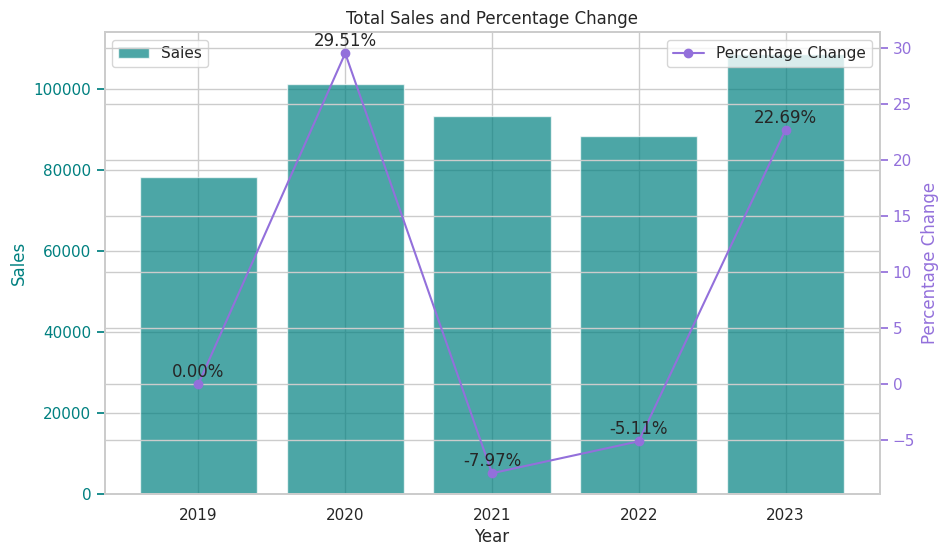

In [ ]:
# Calculate percentage change compared to the previous year
df_total['PercentageChange'] = df_total['Sales'].pct_change() * 100
df_total.fillna(0,inplace=True)

# Plotting column chart and line chart on the same graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Column chart
ax1.bar(df_total.index, df_total['Sales'], color='teal', alpha=0.7, label='Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color='teal')
ax1.tick_params('y', colors='teal')
ax1.legend(loc='upper left')

# Line chart for percentage change
ax2 = ax1.twinx()
ax2.plot(df_total.index, df_total['PercentageChange'], color='mediumpurple', marker='o', label='Percentage Change')
ax2.set_ylabel('Percentage Change', color='mediumpurple')
ax2.tick_params('y', colors='mediumpurple')
ax2.legend(loc='upper right')

# Adding annotations for the line chart
for i, txt in enumerate(df_total['PercentageChange']):
    ax2.annotate(f'{txt:.2f}%', (df_total.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Total Sales and Percentage Change')
plt.show()

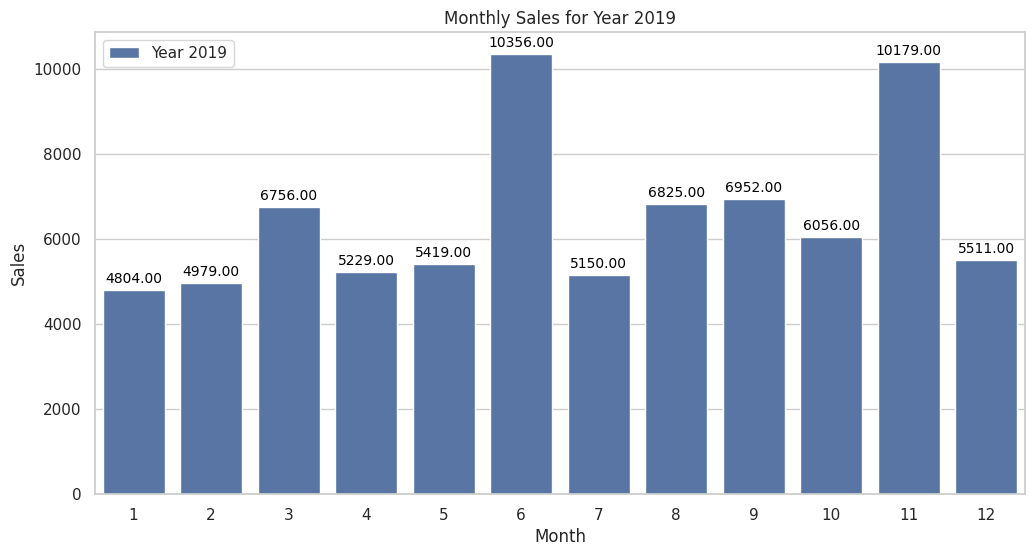

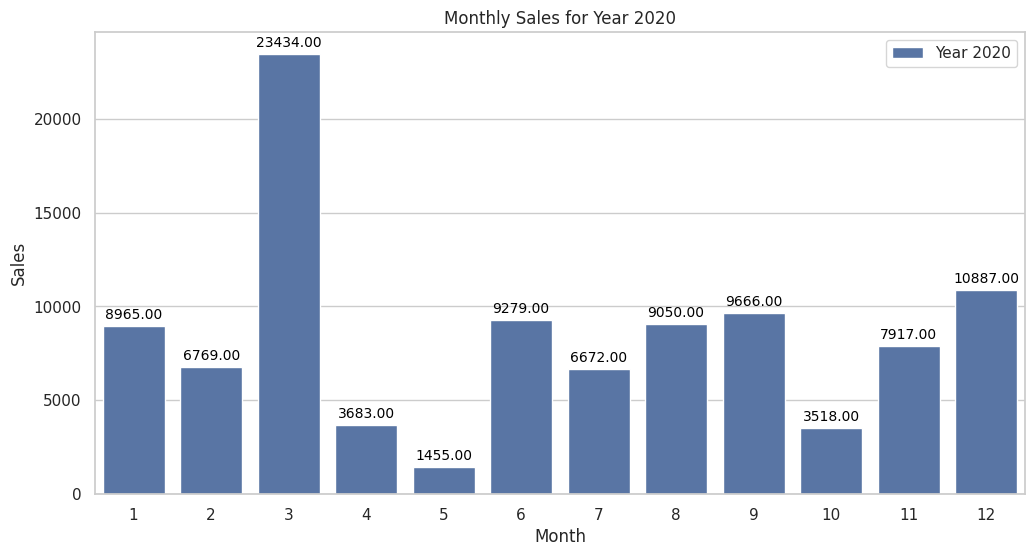

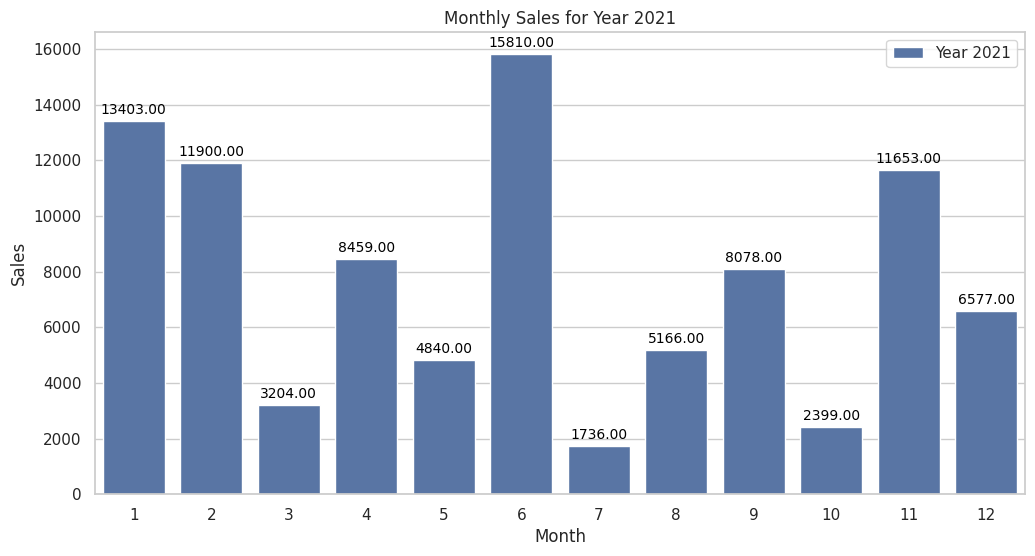

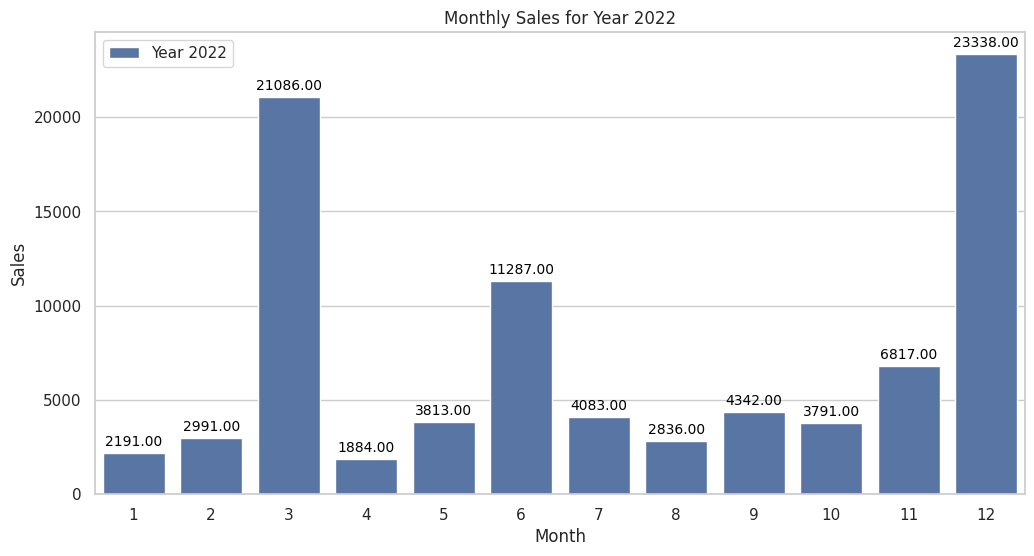

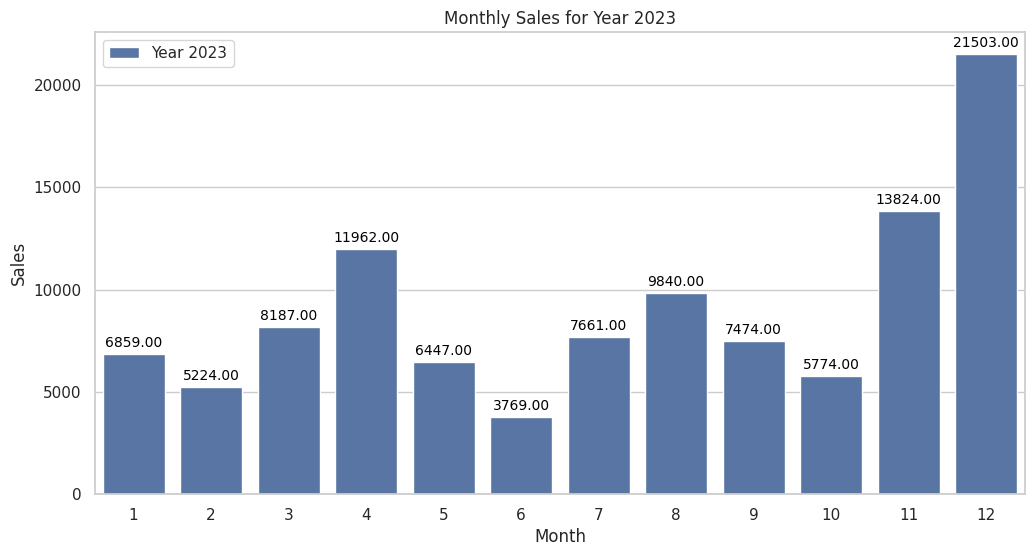

In [ ]:
# Using seaborn for bar plot
sns.set(style="whitegrid")

# Loop through each year and plot
for year in df_month.index.year.unique():
    plt.figure(figsize=(12, 6))
    df_year = df_month[df_month.index.year == year]
    ax = sns.barplot(x=df_year.index.month, y="Sales", data=df_year, label=f'Year {year}')

    # Adding value annotations
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()),
                    ha='center', va='center',
                    size=10, color='black', xytext=(0, 8),
                    textcoords='offset points')

    plt.title(f'Monthly Sales for Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.show()

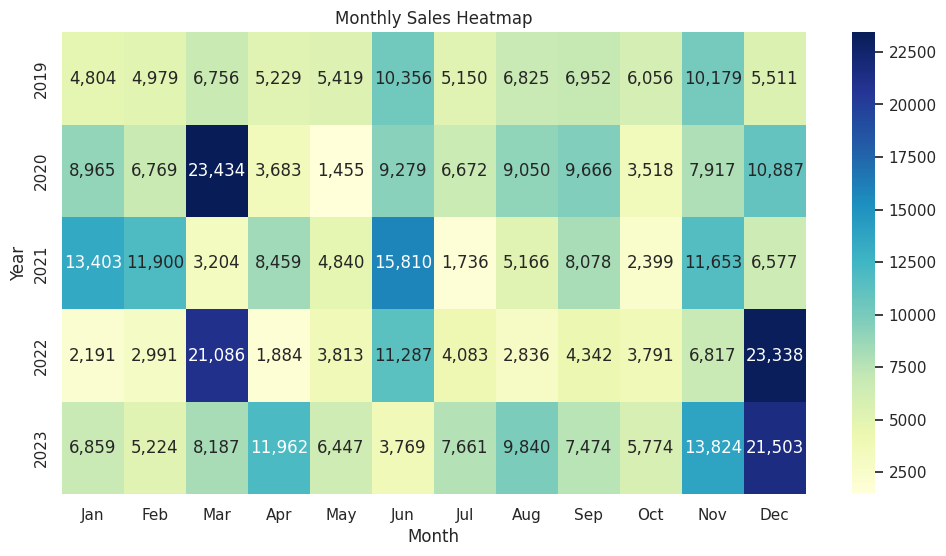

In [ ]:
df_month['Year'] = df_month.index.year
df_month['Month'] = df_month.index.month

# Create a heatmap
pivot_df_heatmap = df_month.pivot_table(index='Year', columns='Month', values='Sales', aggfunc='sum')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df_heatmap, annot=True, fmt=',.0f', cmap='YlGnBu', xticklabels=month_order)
plt.title('Monthly Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

<ipython-input-127-9d2adc648762>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Sales', hue='Year', data=df_month, ci=None)


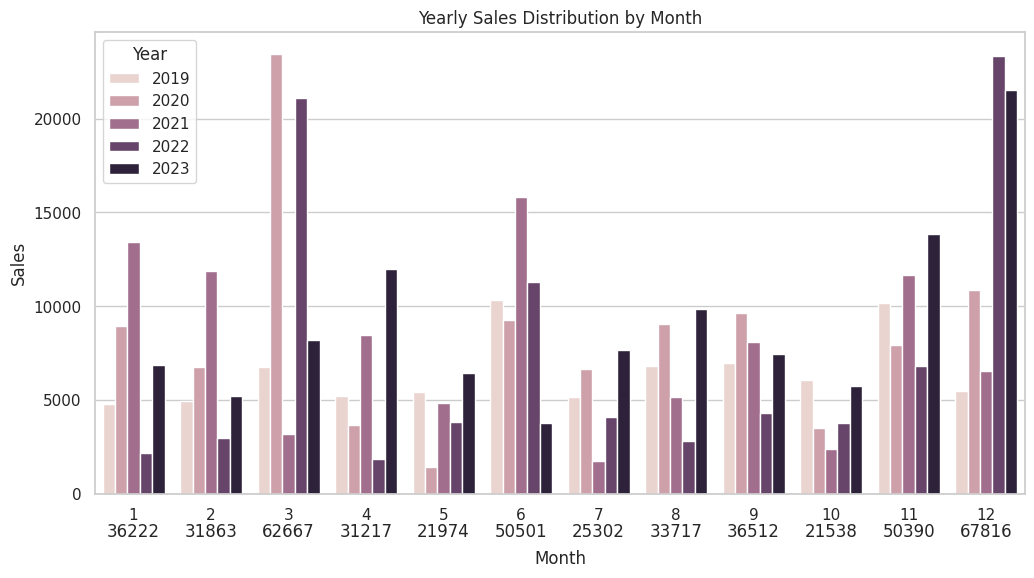

In [ ]:
# Create a sum for each month across years
sum_df = df_month.groupby('Month')['Sales'].sum().reset_index()

# Create a stacked bar chart per month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Sales', hue='Year', data=df_month, ci=None)
plt.title('Yearly Sales Distribution by Month')
plt.xlabel('Month', labelpad=20)
plt.ylabel('Sales')
plt.legend(title='Year')

# Add sum as annotations
for i, value in enumerate(sum_df['Sales']):
    plt.text(i, -2500, f'{value:.0f}', ha='center', va='bottom')

plt.show()

##Time Series Analysis

## *Model 1: Conservative*

In [ ]:
# To perform time series analysis, AD Fuller test needs to perform to see whether the data is stationar or not
# ADF test for stationarity
result = adfuller(df_month['Sales'])

# Print the ADF test result
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check if p-value is less than a significance level (e.g., 0.05)
if result[1] <= 0.05:
    print('The series is stationary.')
else:
    print('The series is not stationary. Apply differencing or other transformations.')


ADF Statistic: -6.6990496545684035
p-value: 3.931661059621203e-09
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
The series is stationary.


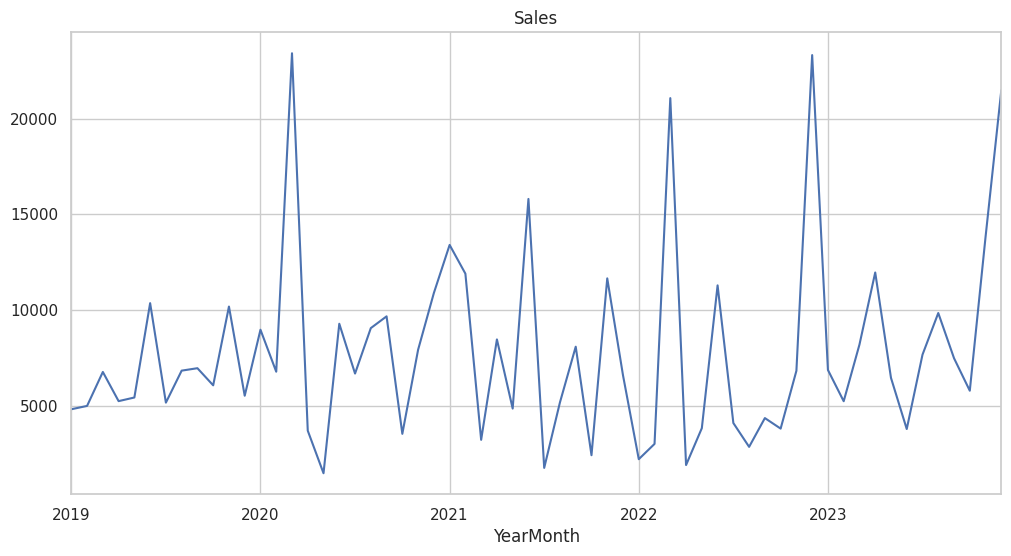

In [ ]:
# Even the p-value shows above the threshold because the gap is not that much
# We are trying to use the data without further transformation in this model.
# Check the plot
df_month['Sales'].plot(figsize=(12, 6))
plt.title('Sales')
plt.show()

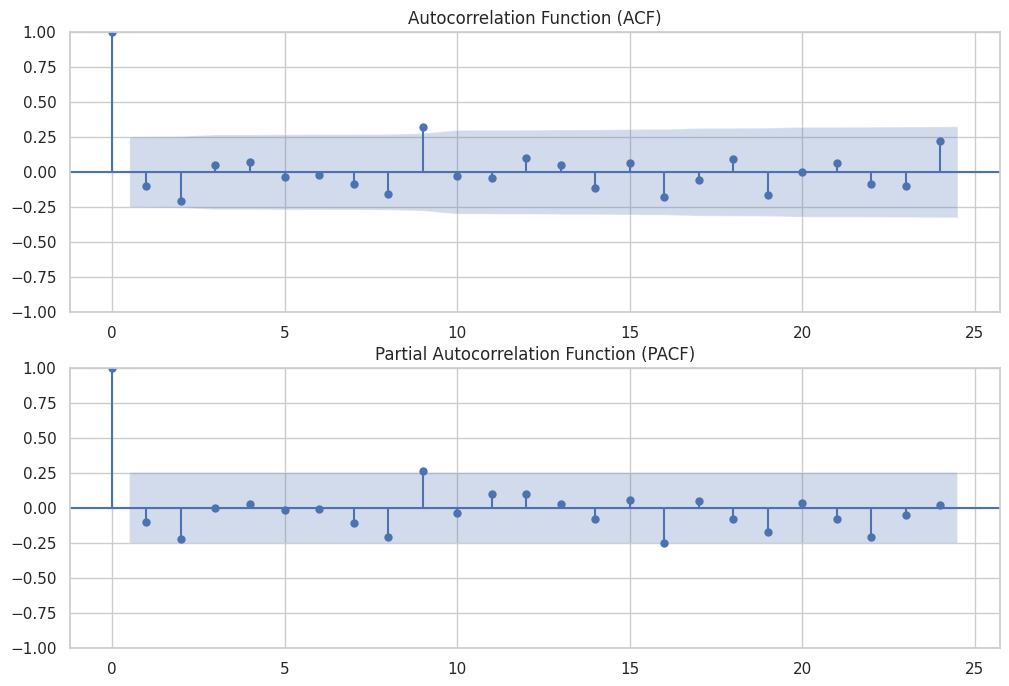

In [ ]:
# Plot the ACF and PACF
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df_month['Sales'], lags=24, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_month['Sales'], lags=24, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [ ]:
# Split the data into train and test set
train_1, test_1 = df_month['Sales'][:48], df_month['Sales'][48:]

In [ ]:
# Based from the ACF and PACF figures above, the model probably would be (9,0,9)
arima_model_1 = ARIMA(train_1, order=(9,0,9))
model_1 = arima_model_1.fit()
print(model_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(9, 0, 9)   Log Likelihood                -554.981
Date:                Mon, 22 Jan 2024   AIC                           1149.963
Time:                        18:14:51   BIC                           1187.387
Sample:                    01-31-2019   HQIC                          1164.105
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7524.8929    179.016     42.035      0.000    7174.028    7875.758
ar.L1          0.4021      0.062      6.450      0.000       0.280       0.524
ar.L2         -0.7223      0.072     -9.998      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# We would like to try another order to compare the AIC score. This time, the machine will choose the best order
# Fit the auto_arima model
auto_model_1 = auto_arima(train_1, seasonal=False, suppress_warnings=True)

# Get the best model's order (p, d, q)
best_order_1 = auto_model_1.order
print(f"Best ARIMA Order for Model 1: {best_order_1}")

# Try the best order chosen by the machine
auto_arima_model_1 = ARIMA(train_1, order=best_order_1)
auto_model_1 = auto_arima_model_1.fit()
print(auto_model_1.summary())

Best ARIMA Order for Model 1: (2, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -475.028
Date:                Mon, 22 Jan 2024   AIC                            958.055
Time:                        18:15:24   BIC                            965.540
Sample:                    01-31-2019   HQIC                           960.884
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7524.8958    723.244     10.404      0.000    6107.364    8942.427
ar.L1         -0.2856      0.228     -1.252      0.211      -0.733       0.162
ar.L2       

In [ ]:
start_1 = len(train_1)
end_1 = len(train_1)+len(test_1)-1
# Get the fitted values
fitted_values_1 = auto_model_1.predict(start=start_1, end=end_1, dynamic=False, typ='levels')
# print(fitted_values)

model_result_1 = pd.DataFrame({
    'YearMonth': df_month.index[48:],
    'actual_sales': df_month['Sales'][48:],
    'predicted_sales': fitted_values_1
})

print(model_result_1)

        YearMonth  actual_sales  predicted_sales
2023-01   2023-01        6859.0      3203.658031
2023-02   2023-02        5224.0      4403.544875
2023-03   2023-03        8187.0      9606.576255
2023-04   2023-04       11962.0      7790.100319
2023-05   2023-05        6447.0      6875.784143
2023-06   2023-06        3769.0      7637.235069
2023-07   2023-07        7661.0      7671.600334
2023-08   2023-08        9840.0      7452.054776
2023-09   2023-09        7474.0      7505.291495
2023-10   2023-10        5774.0      7550.557812
2023-11   2023-11       13824.0      7522.966468
2023-12   2023-12       21503.0      7518.378582


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


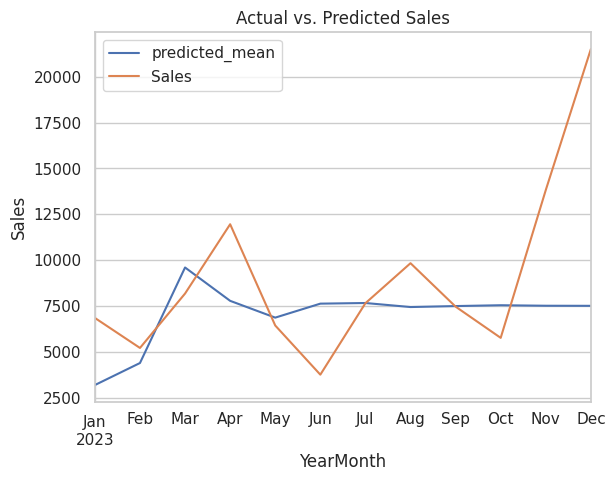

In [ ]:
# Plotting the actual vs predicted
fitted_values_1.plot(legend=True)
test_1.plot(legend=True)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Extract actual and predicted values from the result_df
actual_values_1 = model_result_1['actual_sales']
predicted_values_1 = model_result_1['predicted_sales']

# Calculate MAPE and RMSE
mape_1 = calculate_mape(actual_values_1, predicted_values_1)
rmse_1 = calculate_rmse(actual_values_1, predicted_values_1)

# Display the results
print(f'MAPE: {mape_1:.2f}%')
print(f'RMSE: {rmse_1:.4f}')


MAPE: 33.06%
RMSE: 4939.0781


In [ ]:
# Residuals information
residuals_1 = auto_model_1.resid
print("Mean of Residuals:", residuals_1.mean())
print("Standard Deviation of Residuals:", residuals_1.std())

Mean of Residuals: -177.26906724039273
Standard Deviation of Residuals: 4844.955914915993


In [ ]:
model_result_1.describe()

,actual_sales,predicted_sales
count,12.000000,12.000000
mean,9043.666667,7061.479013
std,4833.265569,1670.723201
min,3769.000000,3203.658031
25%,6278.750000,7307.987118
50%,7567.500000,7520.672525
75%,10370.500000,7645.826385
max,21503.000000,9606.576255


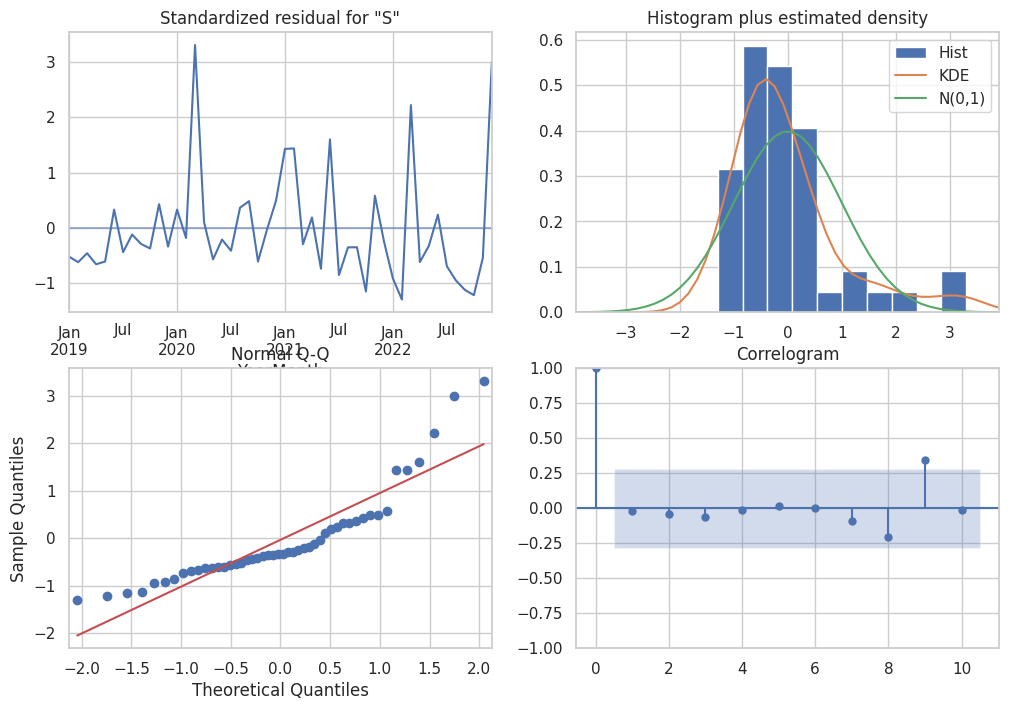

In [ ]:
# Plot diagnostics
auto_model_1.plot_diagnostics(figsize=(12, 8))
plt.show()

## *Model 2: Differencing*

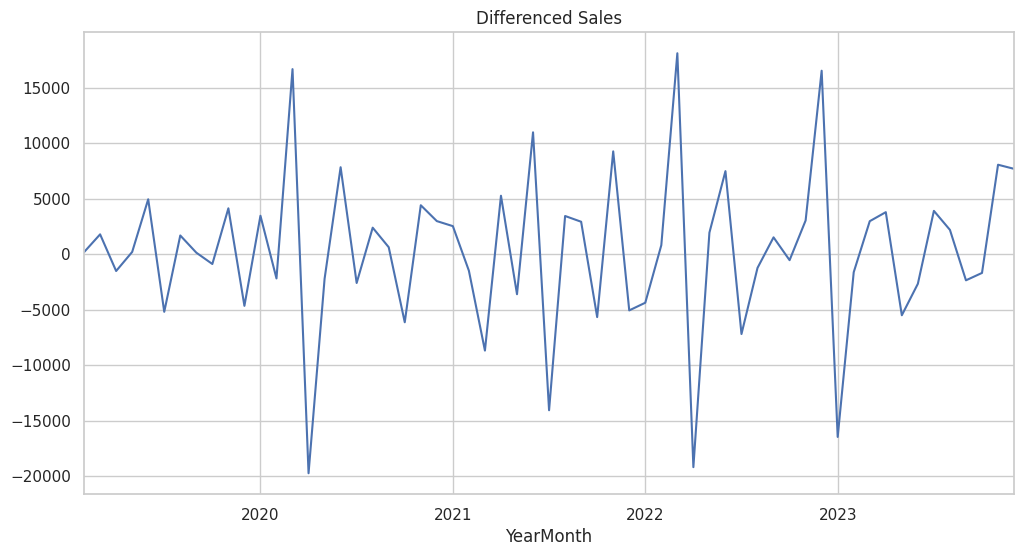

In [ ]:
# Since the data is not stationar (p-value > 0.05), differencing is needed
# First-order differencing
df_month['Sales_diff'] = df_month['Sales'].diff()

# Drop NaN value after differencing
df_month.dropna(inplace=True)

# Plot the differenced series
df_month['Sales_diff'].plot(figsize=(12, 6))
plt.title('Differenced Sales')
plt.show()


In [ ]:
# ADF test for stationarity on the first differenced series
result_diff_1 = adfuller(df_month['Sales_diff'])

# Print the ADF test result for the first differenced series
print('ADF Statistic (1st Diff):', result_diff_1[0])
print('p-value (1st Diff):', result_diff_1[1])
print('Critical Values (1st Diff):', result_diff_1[4])

# Check if p-value is less than a significance level (e.g., 0.05)
if result_diff_1[1] <= 0.05:
    print('The first differenced series is stationary.')
else:
    print('The first differenced series is not stationary. Proceed to second differencing or try other transformations.')

ADF Statistic (1st Diff): -4.454501813211211
p-value (1st Diff): 0.00023741119351865768
Critical Values (1st Diff): {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
The first differenced series is stationary.


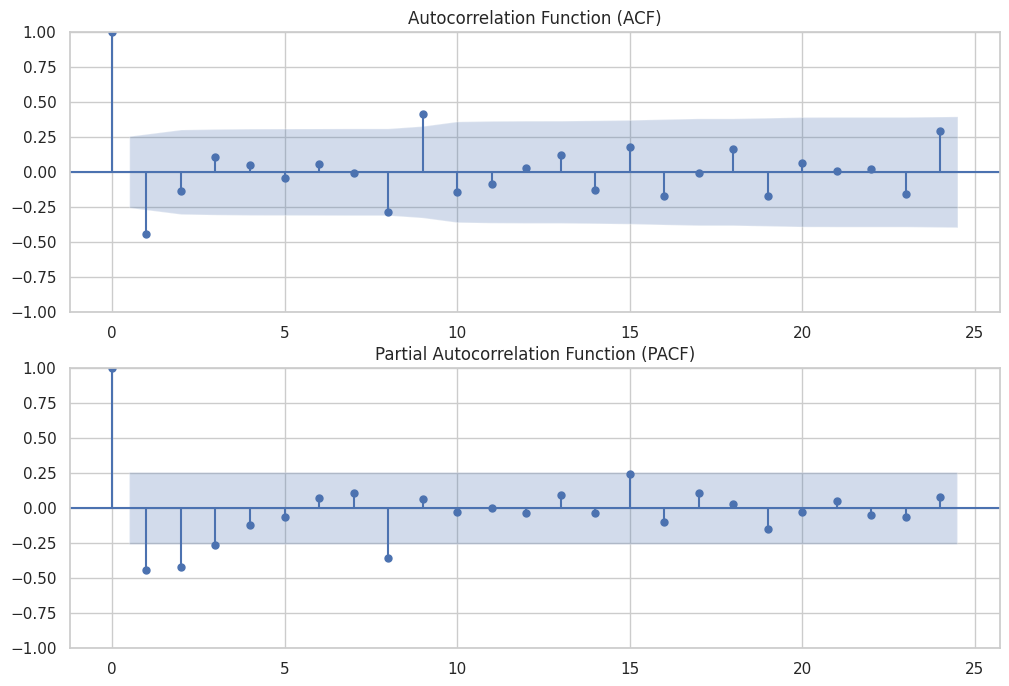

In [ ]:
# ACF and PACF to see if there is any dependency within data points
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df_month['Sales_diff'], lags=24, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_month['Sales_diff'], lags=24, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

# The ACF and PACF show that there is a spike at lag 1
# meaning that each data point does not has any dependency to itself

In [ ]:
# Train-Test Split
train_2, test_2 = df_month[:48]['Sales_diff'], df_month[48:]['Sales_diff']

# Based on the ACF and PACf results, there are several order that we can use (p = [1, 2, 3, 8] and q = [1,9])
# After trying the orders, the best order is (3,1,9) based on the smallest AIC
# Model Training
model_2 = ARIMA(train_2, order=(3, 1, 9))
model_2_fit = model_2.fit()

# Print model summary
print(model_2_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Sales_diff   No. Observations:                   48
Model:                 ARIMA(3, 1, 9)   Log Likelihood                -467.672
Date:                Mon, 22 Jan 2024   AIC                            961.343
Time:                        18:16:25   BIC                            985.395
Sample:                    02-28-2019   HQIC                           970.394
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7025      0.771     -2.209      0.027      -3.213      -0.192
ar.L2         -1.6692      0.769     -2.170      0.030      -3.177      -0.162
ar.L3         -0.7079      0.660     -1.073      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# To check the best order, we use auto arima
# Fit the auto_arima model
auto_model_2 = auto_arima(train_2, seasonal=False, suppress_warnings=True)

# Get the best model's order (p, d, q)
best_order_2 = auto_model_2.order
print(f"Best ARIMA Order for Model 1: {best_order_2}")

# Try the best order chosen by the machine
auto_arima_model_2 = ARIMA(train_2, order=best_order_2)
auto_model_2 = auto_arima_model_2.fit()
print(auto_model_2.summary())

Best ARIMA Order for Model 1: (3, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Sales_diff   No. Observations:                   48
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -477.853
Date:                Mon, 22 Jan 2024   AIC                            969.705
Time:                        18:16:29   BIC                            982.804
Sample:                    02-28-2019   HQIC                           974.655
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1532     71.525      0.100      0.920    -133.032     147.339
ar.L1         -1.0638      0.406     -2.619      0.009      -1.860      -0.268
ar.L2         -0.3355      0.451     -0.744      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
start_2 = len(train_2)
end_2 = len(train_2)+len(test_2)-1
# Get the fitted values
fitted_values_2 = model_2_fit.predict(start=start_2, end=end_2, dynamic=False, typ='levels')

# For this one, we are using the model that the order was obtained from the ACF and PACF since it gives lower AIC score
model_result_2 = pd.DataFrame({
    'YearMonth': df_month.index[48:],
    'actual_sales': df_month['Sales_diff'][48:],
    'predicted_sales': fitted_values_2
})

print(model_result_2)

        YearMonth  actual_sales  predicted_sales
2023-02   2023-02       -1635.0     -5279.400323
2023-03   2023-03        2963.0      7152.869302
2023-04   2023-04        3775.0     -2335.829255
2023-05   2023-05       -5515.0      -606.872323
2023-06   2023-06       -2678.0      7232.578238
2023-07   2023-07        3892.0     -4254.332514
2023-08   2023-08        2179.0     -3281.320339
2023-09   2023-09       -2366.0      8553.468616
2023-10   2023-10       -1700.0     -4840.753783
2023-11   2023-11        8050.0     -2480.218137
2023-12   2023-12        7679.0      7479.980644


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


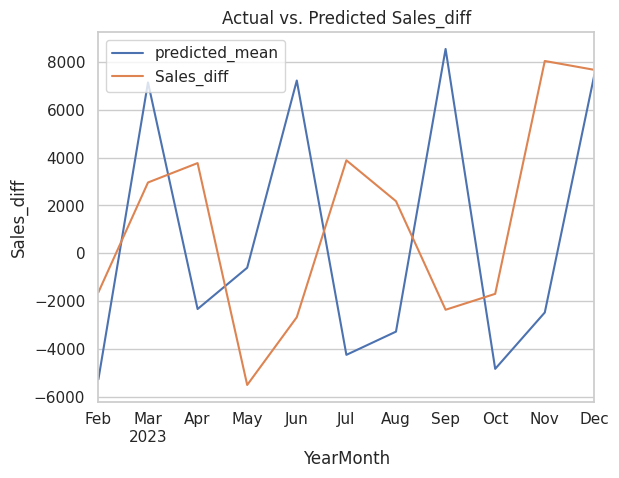

In [ ]:
# Plotting the actual vs predicted
fitted_values_2.plot(legend=True)
test_2.plot(legend=True)
plt.title('Actual vs. Predicted Sales_diff')
plt.xlabel('YearMonth')
plt.ylabel('Sales_diff')
plt.legend()
plt.show()

In [ ]:
# Extract actual and predicted values from the result_df
actual_values_2 = model_result_2['actual_sales']
predicted_values_2 = model_result_2['predicted_sales']

# Calculate MAPE and RMSE
mape_2 = calculate_mape(actual_values_2, predicted_values_2)
rmse_2 = calculate_rmse(actual_values_2, predicted_values_2)

# Display the results
print(f'MAPE: {mape_2:.2f}%')
print(f'RMSE: {rmse_2:.4f}')

MAPE: 202.26%
RMSE: 6919.6048


In [ ]:
# Residuals information
residuals_2 = model_2_fit.resid
print("Mean of Residuals:", residuals_2.mean())
print("Standard Deviation of Residuals:", residuals_2.std())

Mean of Residuals: -61.56230709136961
Standard Deviation of Residuals: 4583.179540163078


In [ ]:
model_result_2.describe()

,actual_sales,predicted_sales
count,11.000000,11.000000
mean,1331.272727,667.288193
std,4426.603350,5655.394785
min,-5515.000000,-5279.400323
25%,-2033.000000,-3767.826427
50%,2179.000000,-2335.829255
75%,3833.500000,7192.723770
max,8050.000000,8553.468616


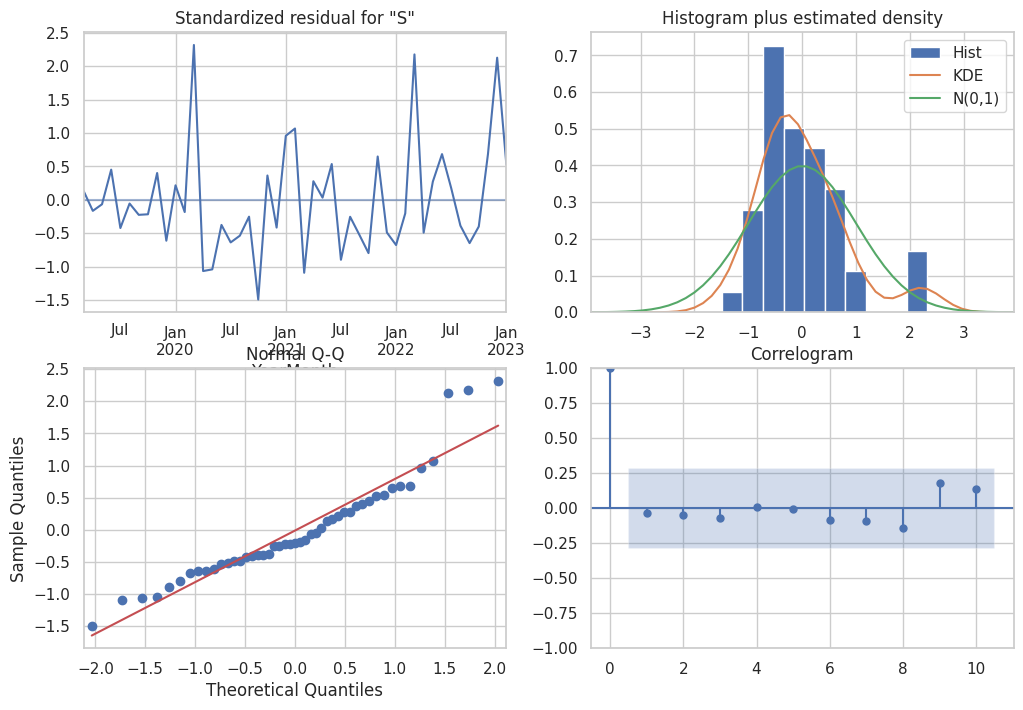

In [ ]:
# Plot diagnostics
model_2_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

## *Model 3: Log Transform*

In [ ]:
# Check the skewness on the data
sales_data = df_month['Sales']
skewness = skew(sales_data)

print('skewness of the sales data:', skewness)

skewness of the sales data: 1.5066112497551996


In [ ]:
# Since the data is right skewed, we are trying to make it symmetric for further analytical statistics result
log_sales = np.log(sales_data)
df_month['log_sales'] = log_sales
print(df_month)

             Sales  Year  Month  Sales_diff  log_sales
YearMonth                                             
2019-02     4979.0  2019      2       175.0   8.512984
2019-03     6756.0  2019      3      1777.0   8.818186
2019-04     5229.0  2019      4     -1527.0   8.561975
2019-05     5419.0  2019      5       190.0   8.597667
2019-06    10356.0  2019      6      4937.0   9.245321
2019-07     5150.0  2019      7     -5206.0   8.546752
2019-08     6825.0  2019      8      1675.0   8.828348
2019-09     6952.0  2019      9       127.0   8.846785
2019-10     6056.0  2019     10      -896.0   8.708805
2019-11    10179.0  2019     11      4123.0   9.228082
2019-12     5511.0  2019     12     -4668.0   8.614501
2020-01     8965.0  2020      1      3454.0   9.101083
2020-02     6769.0  2020      2     -2196.0   8.820109
2020-03    23434.0  2020      3     16665.0  10.061943
2020-04     3683.0  2020      4    -19751.0   8.211483
2020-05     1455.0  2020      5     -2228.0   7.282761
2020-06   

In [ ]:
df_month[['Sales','log_sales']].describe()

,Sales,log_sales
count,59.000000,59.000000
mean,7879.915254,8.785039
std,5087.341719,0.627774
min,1455.000000,7.282761
25%,4591.000000,8.430380
50%,6769.000000,8.820109
75%,9753.000000,9.185290
max,23434.000000,10.061943


In [ ]:
# Now check the skewness for the log_sales
skewness_log = skew(df_month['log_sales'])
print(f'skewness on log_sales: {skewness_log}')

skewness on log_sales: -0.15834681837556627


In [ ]:
# AD Fuller test for log_sales
result_log = adfuller(df_month['log_sales'])

# Print the test result
print('ADF Statistic:', result_log[0])
print('p-value:', result_log[1])
print('Critical Values:', result_log[4])

# Check if the p-value is less than a significance level
if result_log[1]<= 0.05:
  print('The series is stationary.')
else:
  print('The series is not stationary. Differencing or other transformation is needed.')

ADF Statistic: -6.584333117333438
p-value: 7.3792311981564315e-09
Critical Values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
The series is stationary.


<function matplotlib.pyplot.show(close=None, block=None)>

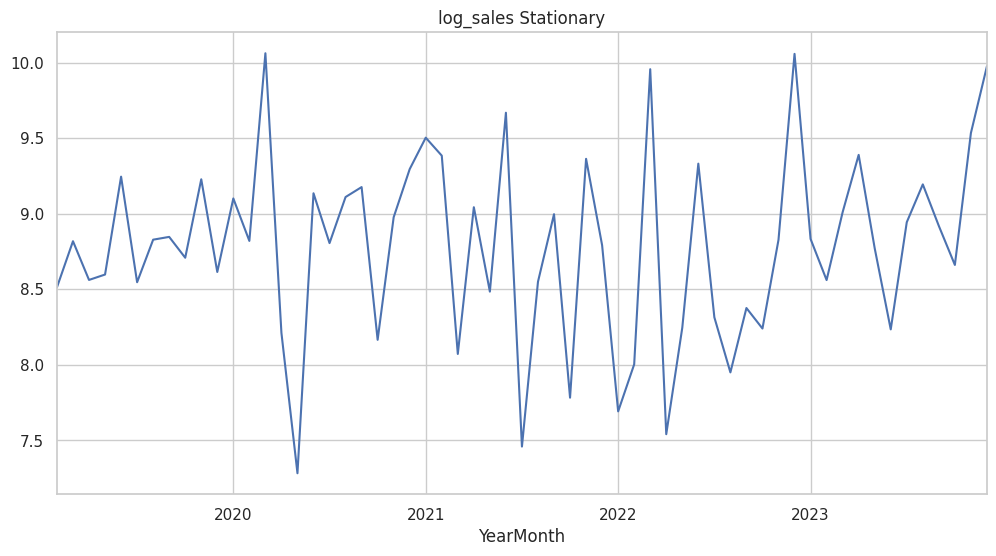

In [ ]:
# Check the stationary
df_month['log_sales'].plot(figsize=(12,6))
plt.title('log_sales Stationary')
plt.show


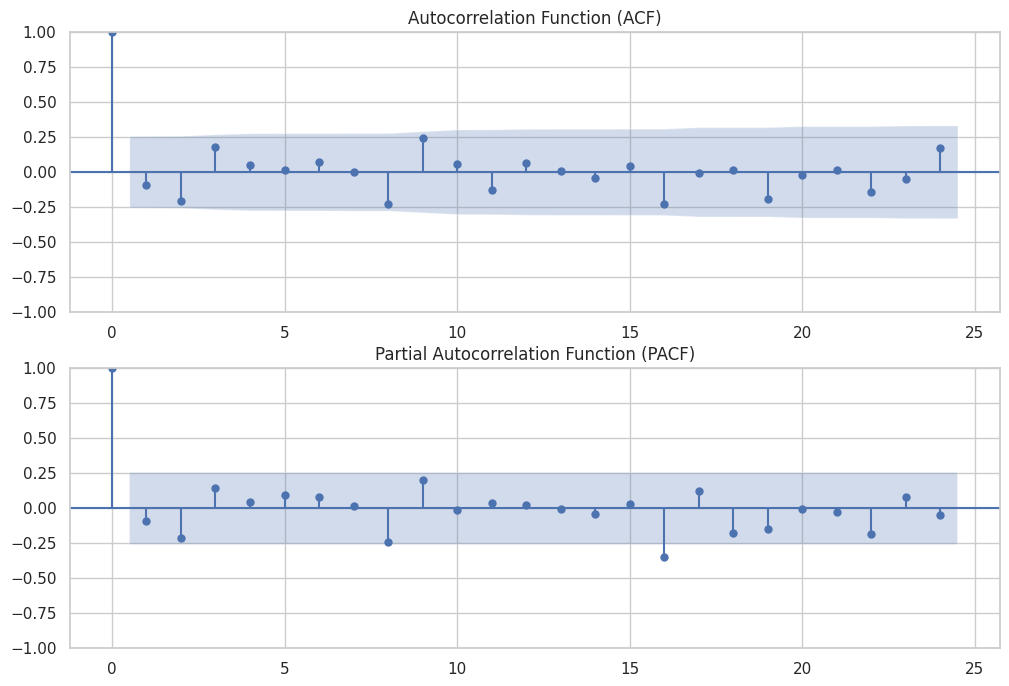

In [ ]:
# ACF and PACF to see if there is any dependency within data points
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df_month['log_sales'].tolist(), lags=24, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df_month['log_sales'].tolist(), lags=24, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [ ]:
# Based on the ACF and PACf results, there are several order that we can use (p = [16] and q = [0])
# Train-Test Split
train_3, test_3= df_month[:48]['log_sales'], df_month[48:]['log_sales']

# Model Training
model_3 = ARIMA(train_3, order=(16, 0, 0))
model_3_fit = model_3.fit()

# Print model summary
print(model_3_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              log_sales   No. Observations:                   48
Model:                ARIMA(16, 0, 0)   Log Likelihood                 -33.870
Date:                Mon, 22 Jan 2024   AIC                            103.740
Time:                        18:18:51   BIC                            137.422
Sample:                    02-28-2019   HQIC                           116.469
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7547      0.081    108.578      0.000       8.597       8.913
ar.L1         -0.0175      0.232     -0.075      0.940      -0.471       0.436
ar.L2         -0.0956      0.152     -0.631      0.5

In [ ]:
# Fit the auto_arima model
auto_model_3 = auto_arima(train_3, seasonal=False, suppress_warnings=True)

# Get the best model's order (p, d, q)
best_order_3 = auto_model_3.order
print("Best ARIMA Order:", best_order_3)

# Try the best order chosen by the machine
auto_arima_model_3 = ARIMA(train_3, order=best_order_3)
auto_model_3 = auto_arima_model_3.fit()
print(auto_model_3.summary())

# Even though this model gives lower AIC score, but we won't use this
# Because if the order is (0,0,0), the predicted values will be the average

Best ARIMA Order: (0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:              log_sales   No. Observations:                   48
Model:                          ARIMA   Log Likelihood                 -46.791
Date:                Mon, 22 Jan 2024   AIC                             97.583
Time:                        18:18:56   BIC                            101.325
Sample:                    02-28-2019   HQIC                            98.997
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7317      0.093     94.029      0.000       8.550       8.914
sigma2         0.4114      0.089      4.615      0.000       0.237       0.586
Ljung-Box (L1) (Q):     

In [ ]:
start_3 = len(train_3)
end_3 = len(train_3)+len(test_3)-1
# Get the fitted values
fitted_values_3 = model_3_fit.predict(start=start_3, end=end_3, dynamic=False, typ='levels')

# For this one, we are using the model that the order was obtained from the ACF and PACF since it gives lower AIC score
model_result_3 = pd.DataFrame({
    'YearMonth': df_month.index[48:],
    'actual_sales': df_month['log_sales'][48:],
    'predicted_sales': fitted_values_3
})

print(model_result_3)

        YearMonth  actual_sales  predicted_sales
2023-02   2023-02      8.561019         8.736586
2023-03   2023-03      9.010303         8.273037
2023-04   2023-04      9.389490         8.987787
2023-05   2023-05      8.771370         9.642417
2023-06   2023-06      8.234565         9.465210
2023-07   2023-07      8.943898         7.915571
2023-08   2023-08      9.194211         8.704902
2023-09   2023-09      8.919186         9.147388
2023-10   2023-10      8.661120         8.279258
2023-11   2023-11      9.534161         9.441788
2023-12   2023-12      9.975948         9.089734


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


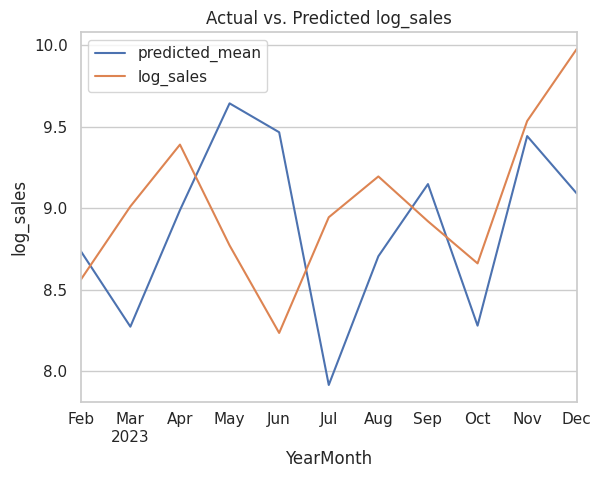

In [ ]:
# Plotting the actual vs predicted
fitted_values_3.plot(legend=True)
test_3.plot(legend=True)
plt.title('Actual vs. Predicted log_sales')
plt.xlabel('YearMonth')
plt.ylabel('log_sales')
plt.legend()
plt.show()

In [ ]:
# Extract actual and predicted values from the result_df
actual_values_3 = model_result_3['actual_sales']
predicted_values_3 = model_result_3['predicted_sales']

# Calculate MAPE and RMSE
mape_3 = calculate_mape(actual_values_3, predicted_values_3)
rmse_3 = calculate_rmse(actual_values_3, predicted_values_3)

# Display the results
print(f'MAPE: {mape_3:.2f}%')
print(f'RMSE: {rmse_3:.4f}')

MAPE: 6.64%
RMSE: 0.6940


In [ ]:
# Residuals information
residuals_3 = model_3_fit.resid
print("Mean of Residuals:", residuals_3.mean())
print("Standard Deviation of Residuals:", residuals_3.std())

Mean of Residuals: -0.002071361035127709
Standard Deviation of Residuals: 0.48630005575851876


In [ ]:
model_result_3.describe()

,actual_sales,predicted_sales
count,11.000000,11.000000
mean,9.017752,8.880334
std,0.487775,0.554716
min,8.234565,7.915571
25%,8.716245,8.492080
50%,8.943898,8.987787
75%,9.291851,9.294588
max,9.975948,9.642417


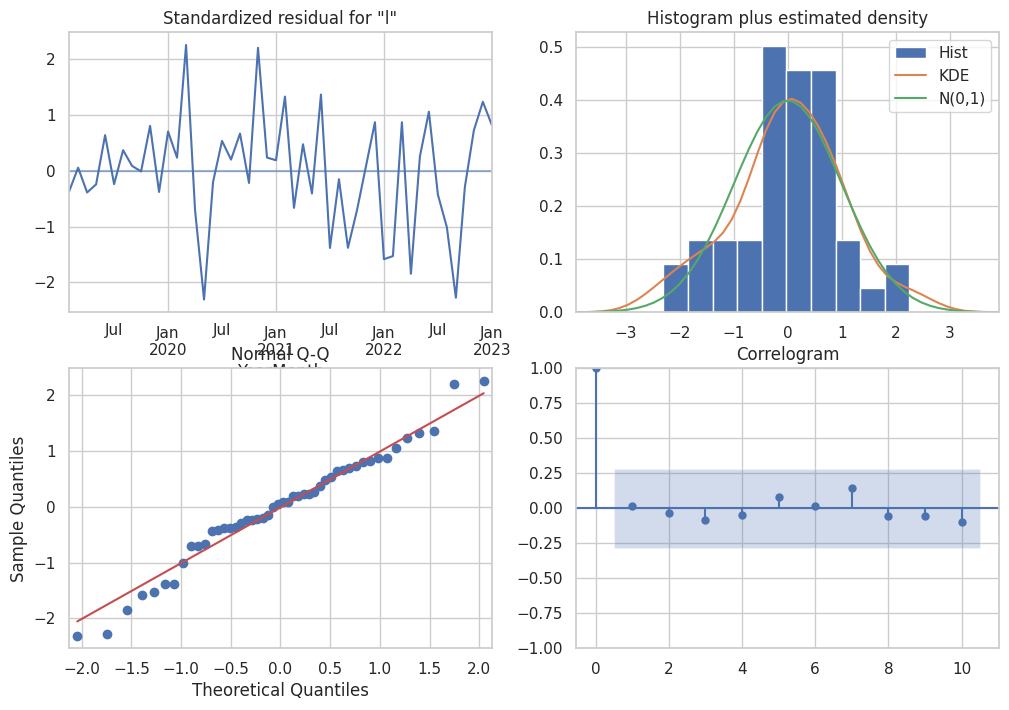

In [ ]:
# Plot diagnostics
model_3_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

## *Sales Predictions*

In [ ]:
# Based on the three models above, model 3 is the best
# This decision based on the MAPE and RMSE score
model_fix = ARIMA(df_month['log_sales'], order=(16,0,0))
model_fix = model_fix.fit()

In [ ]:
index_pred = pd.date_range(start='2023-12', end='2024-12')
pred_log_sales = model_fix.predict(start=len(df_month), end=len(df_month)+11, typ='levels').rename('ARIMA Predictions')
pred_sales = np.exp(pred_log_sales)
print(pred_sales)

2024-01    8531.083027
2024-02    9954.888642
2024-03    6552.253155
2024-04    3567.078477
2024-05    8623.692754
2024-06    9486.961002
2024-07    4121.099185
2024-08    3835.535599
2024-09    9047.390851
2024-10    8636.421670
2024-11    6010.600460
2024-12    7571.898556
Freq: M, Name: ARIMA Predictions, dtype: float64


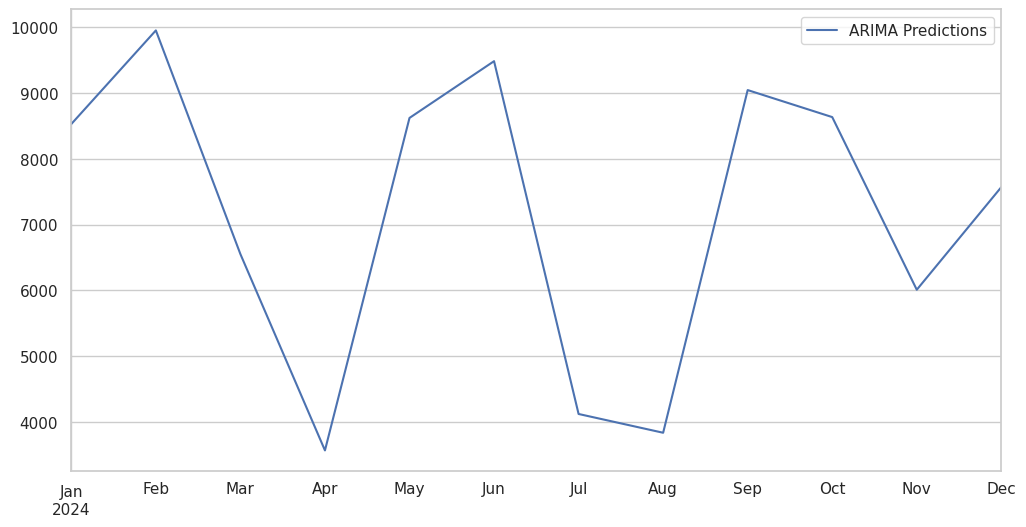

In [ ]:
pred_sales.plot(figsize=(12,6), legend=True)
plt.show()